# Linear Regression Multivariate

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import time
from sys import stdout

## Read dataset

In [2]:
dataset = pd.read_csv("./ex1data2.txt", delimiter=',', header=0, dtype=np.float32)
dataset.columns

Index(['Size of the house (in square feet)', 'Number of bedrooms',
       'Price of the house'],
      dtype='object')

## Plot Dataset

In [3]:
dataset.loc[:,["Size of the house (in square feet)"]]
dataset.iloc[:,[0]]

,Size of the house (in square feet)
0,2104.0
1,1600.0
2,2400.0
3,1416.0
4,3000.0
5,1985.0
6,1534.0
7,1427.0
8,1380.0
9,1494.0


Text(0, 0.5, 'Price of the house')

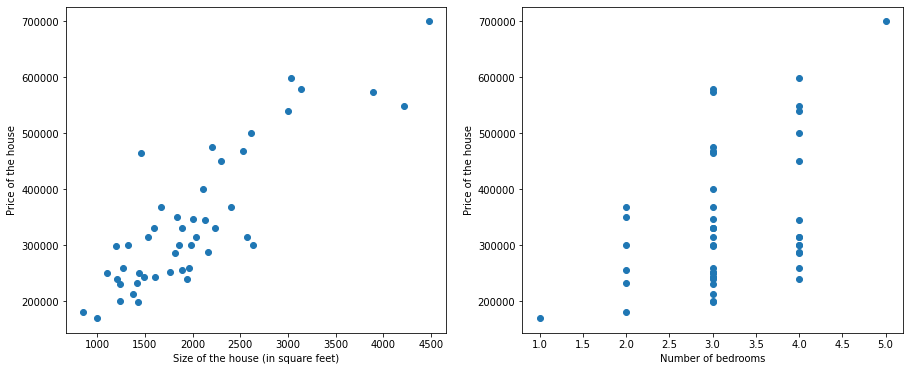

In [4]:
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(dataset["Size of the house (in square feet)"],dataset["Price of the house"])
ax1.set_xlabel("Size of the house (in square feet)")
ax1.set_ylabel("Price of the house")

ax2.scatter(dataset["Number of bedrooms"],dataset["Price of the house"])
ax2.set_xlabel("Number of bedrooms")
ax2.set_ylabel("Price of the house")

## Design Matrix for Supervised Learning

In [5]:
X = dataset.iloc[:,[0,1]].values
y = dataset.iloc[:,[-1]].values

## Feature Scaling

$$\large z_j^{(i)} = \frac{x_j^{(i)} - \mu_j}{\sigma_j}$$

$$\large z_j^{(i)} = \frac{x_j^{(i)} - \mu_j}{max_j - min_j}$$

In [6]:
def featureScaling(X):
    Z = np.copy(X)
    mu = np.mean(Z,axis=0)
    std = np.std(Z,axis=0)
    Z = (Z - mu)/std
    return Z

In [7]:
Z = featureScaling(X)
X_scaled = np.c_[np.ones(Z.shape[0]),Z] # add intercept column

## Defining Cost Functions

In [8]:
def computeCostLoopBase(X, y, theta = np.zeros((X_scaled.shape[1],1))):
    m = X.shape[0]
    J = 0

    elapsed_time = -time.time()

    for i in range(m):
        h = 0
        for k in range(X.shape[1]):
            h += (theta[k]*X[i][k])
        J += ( h - y[i]) ** 2 # individual loss of i-th element

    J /= 2*m

    elapsed_time += time.time()
    elapsed_time_ms = np.round(elapsed_time*1000,3)

    return J, elapsed_time_ms

In [9]:
def computeCostVectorized(X, y, theta = np.zeros((X_scaled.shape[1],1))):
    J = 0
    m = X.shape[0]
    elapsed_time = -time.time()
    J = 1/(2*m) * ((X.dot(theta) - y).T.dot(X.dot(theta) - y))
    elapsed_time += time.time()
    elapsed_time_ms = np.round(elapsed_time*1000,3)
    return J,elapsed_time_ms

In [10]:
J_lb,etime_lb = computeCostLoopBase(X_scaled,y)
print(J_lb)
print(etime_lb)

[6.55915481e+10]
0.942


In [11]:
J_v, etime_v = computeCostVectorized(X_scaled,y)
print(J_v)
print(etime_v)

[[6.55915481e+10]]
0.154


## Fitting model

In [12]:
def gradientDescentLoop(X, y, theta = np.zeros((X_scaled.shape[1],1)), alpha = 0.001, n_iters = 1000, early = False, epsilon = 0.000001):
    m = X.shape[0]
    n = X.shape[1]
    J = np.zeros((n_iters,1))
    theta_history = []
    theta_gd = np.copy(theta)

    theta_history.append(theta)

    elapsed_time = -time.time()
    for iter in range(n_iters):
        prev = J[iter -1]
        J[iter],_= computeCostLoopBase(X,y,theta_gd)
        #stdout.write("\rIteration {}/{} Cost: {} Loss: {}".format(iter,n_iters,J[iter], prev-J[iter]))

        h = np.zeros((m,1))
        partial_sum = np.zeros((n,1))
        for i in range(m):
            for j in range(n):
                h[i] += theta_gd[j]*X[i][j]
            for j in range(n):
                partial_sum[j] += (h[i] - y[i])*X[i][j]
        for j in range(n):
            theta_gd[j] = theta_gd[j] - ((alpha/m)* partial_sum[j])

        theta_history.append(np.copy(theta_gd))

        if early:
            if (iter != 0) and (J[iter -1 ] - J[iter] < epsilon):
                elapsed_time += time.time()
                elapsed_time = np.round(elapsed_time*1000,3)
                #stdout.write("\n")
                return theta_gd,J[J!=0],elapsed_time,theta_history

    elapsed_time += time.time()
    elapsed_time = np.round(elapsed_time*1000,3)
    #stdout.write("\n")
    return theta_gd,J,elapsed_time,theta_history

In [13]:
theta,J_history_loop,etime_gd_loop, theta_history_loop = gradientDescentLoop(X_scaled,y,alpha=0.003, n_iters=20000)
print("Time: {}ms".format(etime_gd_loop))
print("Theta0: {} Theta1: {}".format(theta[0],theta[1]))
print("Cost: {}".format(J_history_loop))

Time: 28627.402ms
Theta0: [340412.66785091] Theta1: [109447.79936733]
Cost: [[6.55915481e+10]
 [6.52019829e+10]
 [6.48148674e+10]
 ...
 [2.04328004e+09]
 [2.04328004e+09]
 [2.04328004e+09]]


In [14]:
def gradientDescentVectorized(X, y, theta = np.zeros((X_scaled.shape[1],1)), alpha = 0.001, n_iters = 1000, early = False, epsilon = 0.000001):
    m = X.shape[0]
    n = X.shape[1]
    J = np.zeros((n_iters,1))
    theta_history = []
    theta_gd = np.copy(theta)

    theta_history.append(theta)

    elapsed_time = -time.time()
    for iter in range(n_iters):
        J[iter],_= computeCostVectorized(X,y,theta_gd)

        theta_gd = theta_gd - (alpha/m) * X.T.dot(X.dot(theta_gd) -y)

        theta_history.append(np.copy(theta_gd))

        if early:
            if (iter != 0) and (J[iter -1 ] - J[iter] < epsilon):
                elapsed_time += time.time()
                elapsed_time = np.round(elapsed_time*1000,3)
                #stdout.write("\n")
                return theta_gd,J[J!=0],elapsed_time,theta_history

    elapsed_time += time.time()
    elapsed_time = np.round(elapsed_time*1000,3)
    #stdout.write("\n")
    return theta_gd,J,elapsed_time,theta_history

In [16]:
theta_vec,J_history_vec,etime_gd_vec, theta_history_vec = gradientDescentVectorized(X_scaled,y,alpha=0.001, n_iters=200000)
print("Time Vectorized: {}ms  / Time Loop: {}ms".format(etime_gd_vec,etime_gd_loop))
print("Theta0: {} Theta1: {}".format(theta_vec[0],theta_vec[1]))
print("Cost: {}".format(J_history_vec))

Time Vectorized: 4192.488ms  / Time Loop: 28627.402ms
Theta0: [340412.66785089] Theta1: [109447.79936752]
Cost: [[6.55915481e+10]
 [6.54615565e+10]
 [6.53318377e+10]
 ...
 [2.04328004e+09]
 [2.04328004e+09]
 [2.04328004e+09]]
